In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols




In [2]:
test_array = (np.arange(1, 11))
test_array_frame = pd.DataFrame({"test_array": test_array})

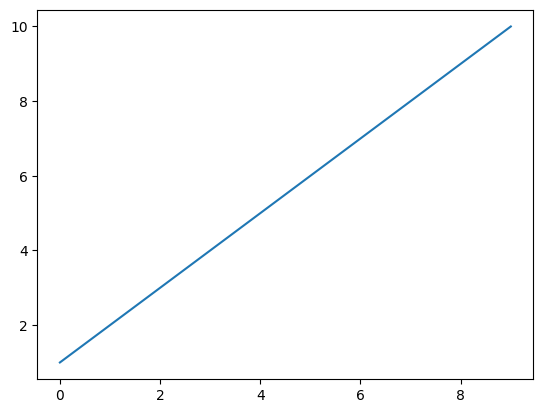

In [3]:
plt.plot(test_array_frame)

In [4]:
# Read the csv file. \\ for spaces in filepath
fish = pd.read_csv('C:\\Users\\jacooke2\\OneDrive - Wake Tech Community College\\WGU\\D208\\fish.csv')

In [5]:
print(fish)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [6]:
#Create data table with only Bream selected
bream = fish[fish["Species"] == "Bream"]
print(bream)

   Species  Weight  Length1  Length2  Length3   Height   Width
0    Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1    Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2    Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3    Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4    Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5    Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6    Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7    Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8    Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9    Bream   500.0     28.5     30.7     36.2  14.2266  4.9594
10   Bream   475.0     28.4     31.0     36.2  14.2628  5.1042
11   Bream   500.0     28.7     31.0     36.2  14.3714  4.8146
12   Bream   500.0     29.1     31.5     36.4  13.7592  4.3680
13   Bream   340.0     29.5     32.0     37.3  13.9129  5.0728
14   Bream   600.0     29.4     32.0     37.2  14.9544 

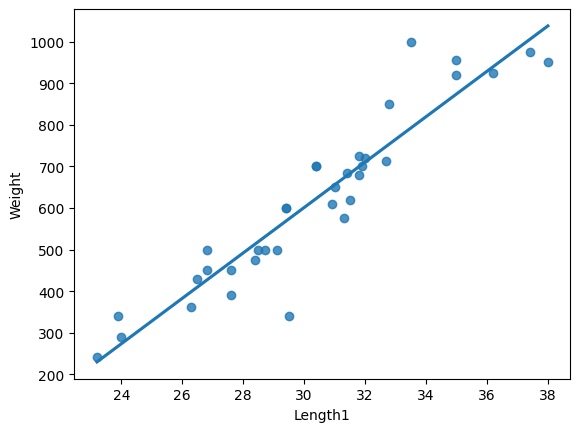

In [14]:
# Regression plot with length as the explanatory variable and weight as the response (dependant) variable
sns.regplot(x="Length1",
            y="Weight",
            data=bream,
            ci=None)

plt.show()

In [8]:
#Create the OLS fitted model
mdl_mass_vs_length = ols("Weight ~ Length1", data=bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
Length1        54.549981
dtype: float64


In [9]:
# Create new explanatory data to use
# This creates new lengths, 20-41 and puts them into a data frame with one column
explanatory_data = pd.DataFrame({"Length1": np.arange(20, 41)})
                                

In [10]:
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [13]:

# Create a data frame with our explanatory data
explanatory_data = pd.DataFrame({"Length1": np.arange(20, 41)})

#Assign the calaculated dependant variables to a column in our data frame - name new data frame
prediction_data = explanatory_data.assign(weight=mdl_mass_vs_length.predict(explanatory_data))
print(prediction_data.head())

   Length1      weight
0       20   55.652054
1       21  110.202035
2       22  164.752015
3       23  219.301996
4       24  273.851977


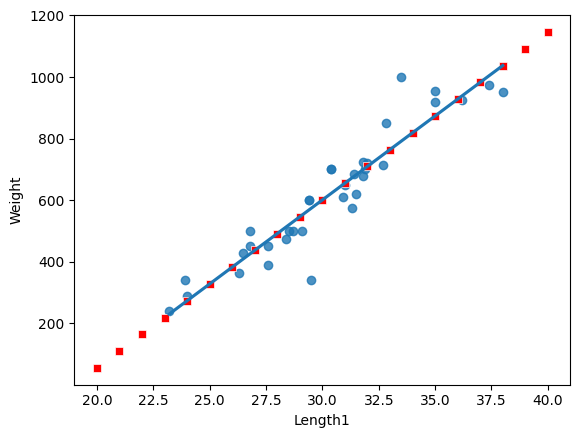

In [15]:
# Regression plot with length as the explanatory variable and weight as the response (dependant) variable
# Create a Matplotlib object fig that will display both plots with the plt.show()
fig = plt.figure()
sns.regplot(x="Length1",
            y="Weight",
            data=bream,
            ci=None)

#Scatter plot of the prediction table 
sns.scatterplot(x="Length1",
                y="weight",
                data=prediction_data,
                color="red",
                marker="s")

plt.show()